Project(Group 1)
Objective: Predict the power generated (in Joules) based on various environmental factors.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving solarpowergeneration.csv to solarpowergeneration (1).csv


In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import the dataset
df=pd.read_csv('solarpowergeneration.csv')
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


EDA

In [ ]:
df.shape

(2920, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.2 KB


In [ ]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [ ]:
#replace null value with median

df.fillna(df.median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),0
average-pressure-(period),0
power-generated,0


In [ ]:
df.nunique()


,0
distance-to-solar-noon,2660
temperature,37
wind-direction,35
wind-speed,159
sky-cover,5
visibility,17
humidity,75
average-wind-speed-(period),32
average-pressure-(period),90
power-generated,1529


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.skew()


,0
distance-to-solar-noon,0.211452
temperature,0.125916
wind-direction,-1.629519
wind-speed,0.416851
sky-cover,0.080284
visibility,-3.862446
humidity,-0.955607
average-wind-speed-(period),0.623168
average-pressure-(period),0.441384
power-generated,1.307035


In [ ]:
# central tendency
df.describe()


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.128767,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.260333,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


array([[<Axes: title={'center': 'distance-to-solar-noon'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'wind-direction'}>],
       [<Axes: title={'center': 'wind-speed'}>,
        <Axes: title={'center': 'sky-cover'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'average-wind-speed-(period)'}>,
        <Axes: title={'center': 'average-pressure-(period)'}>],
       [<Axes: title={'center': 'power-generated'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1200x600 with 0 Axes>

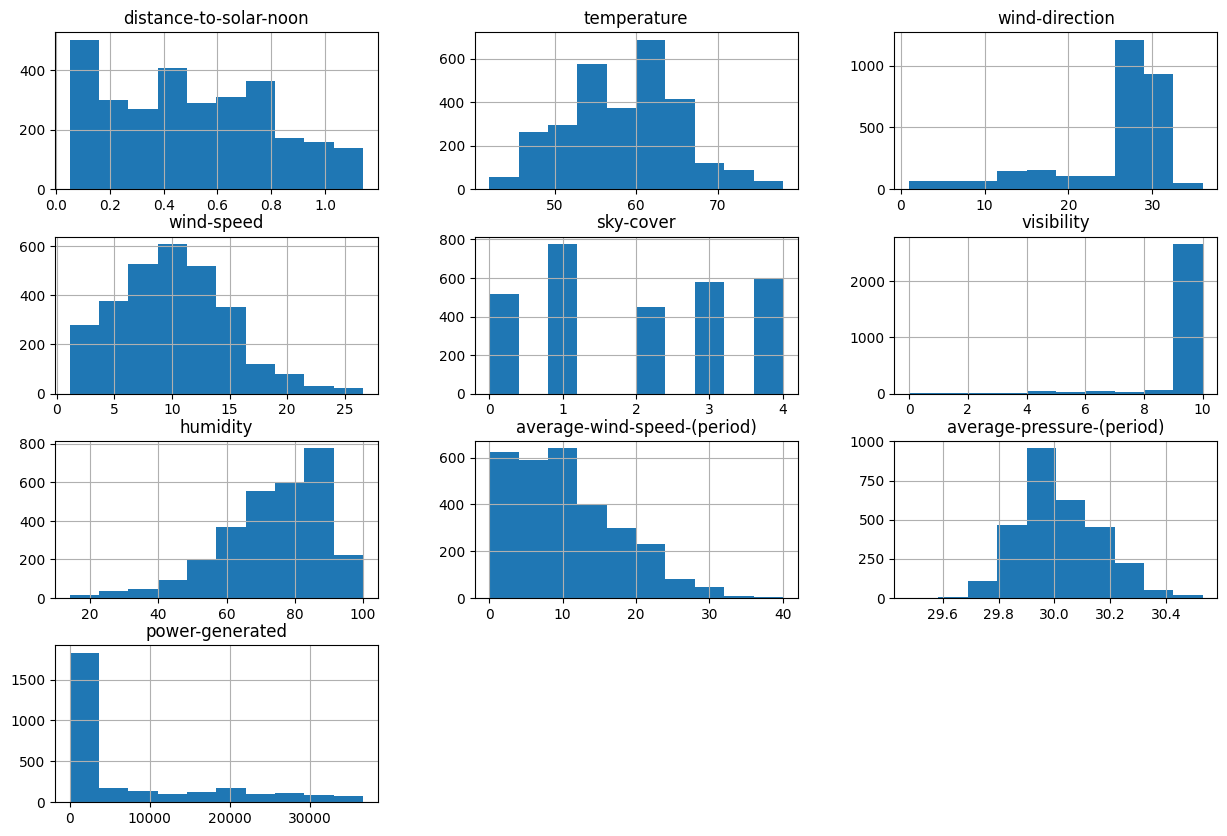

In [ ]:
# histogern
plt.figure(figsize=(12, 6))
df.hist(figsize=(15,10))


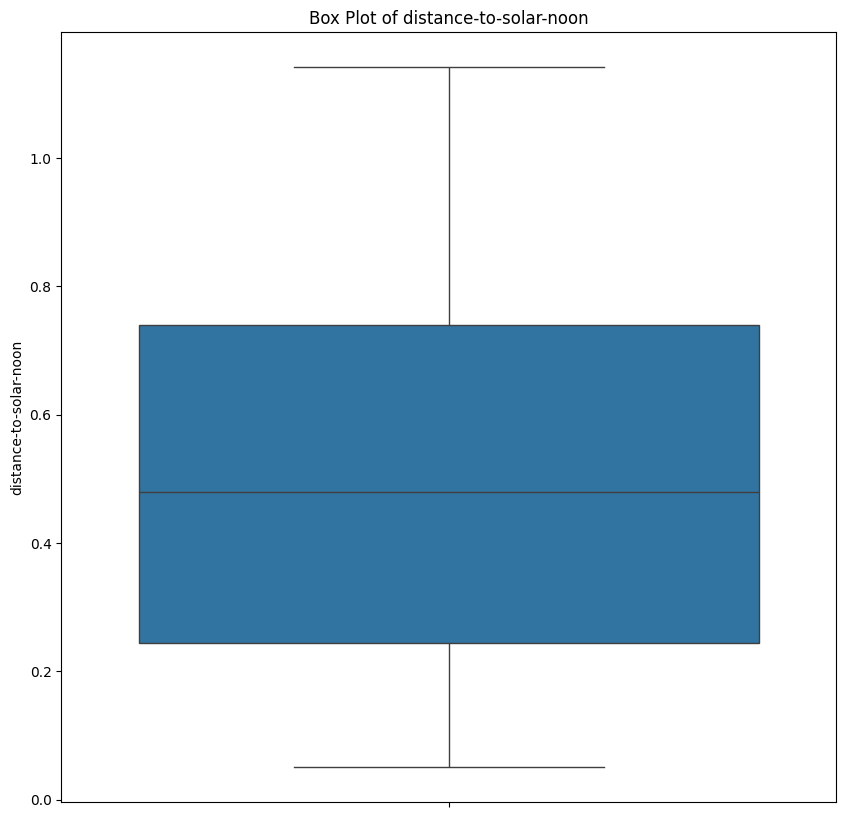

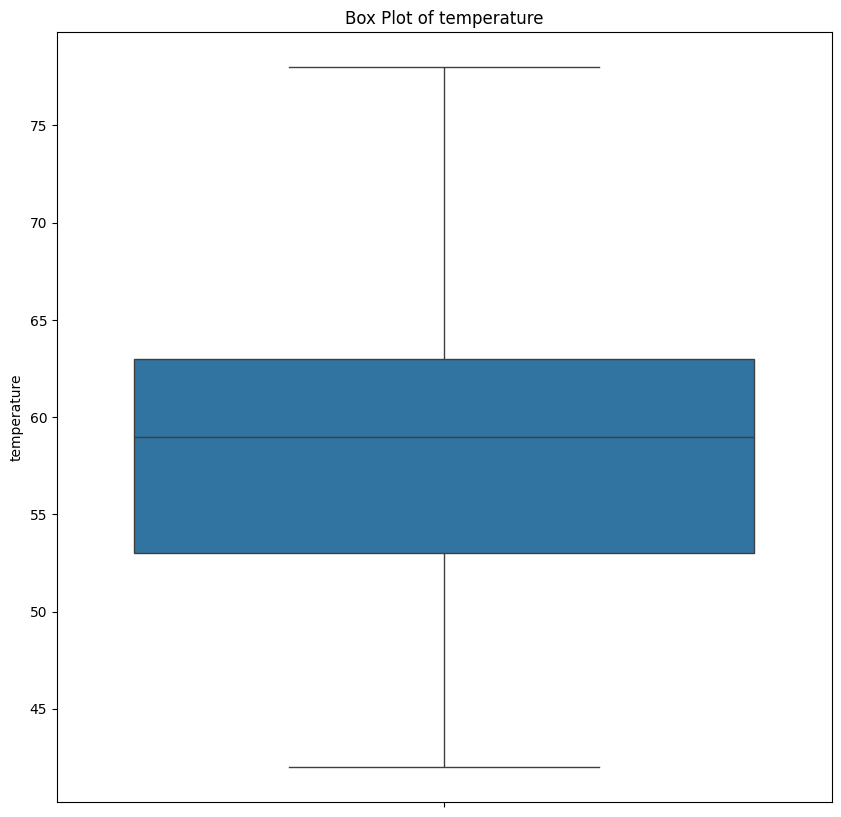

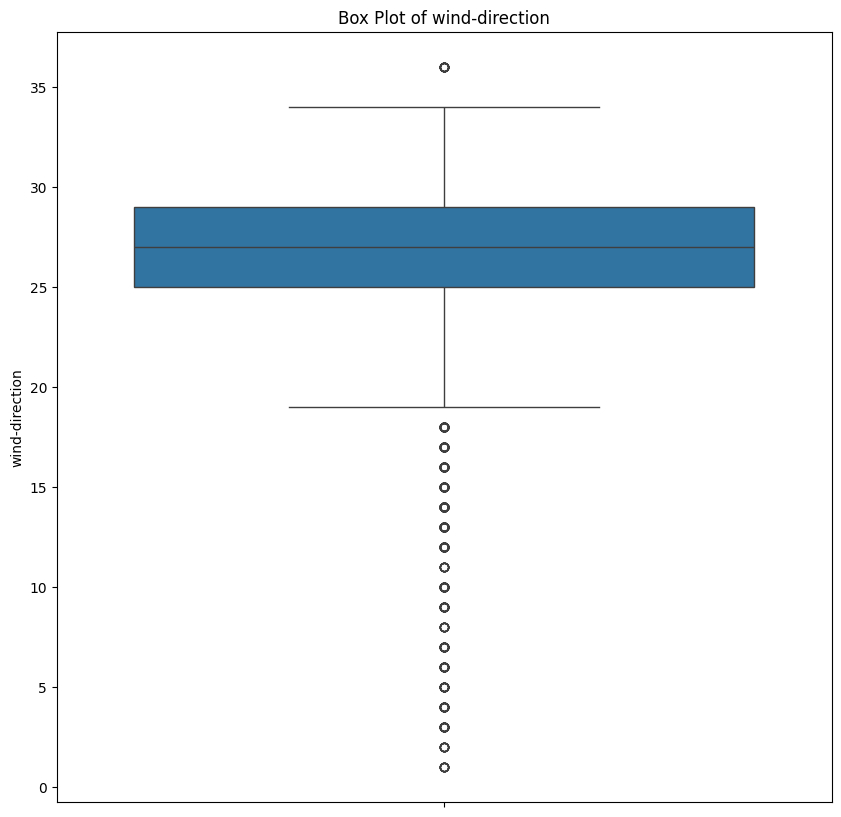

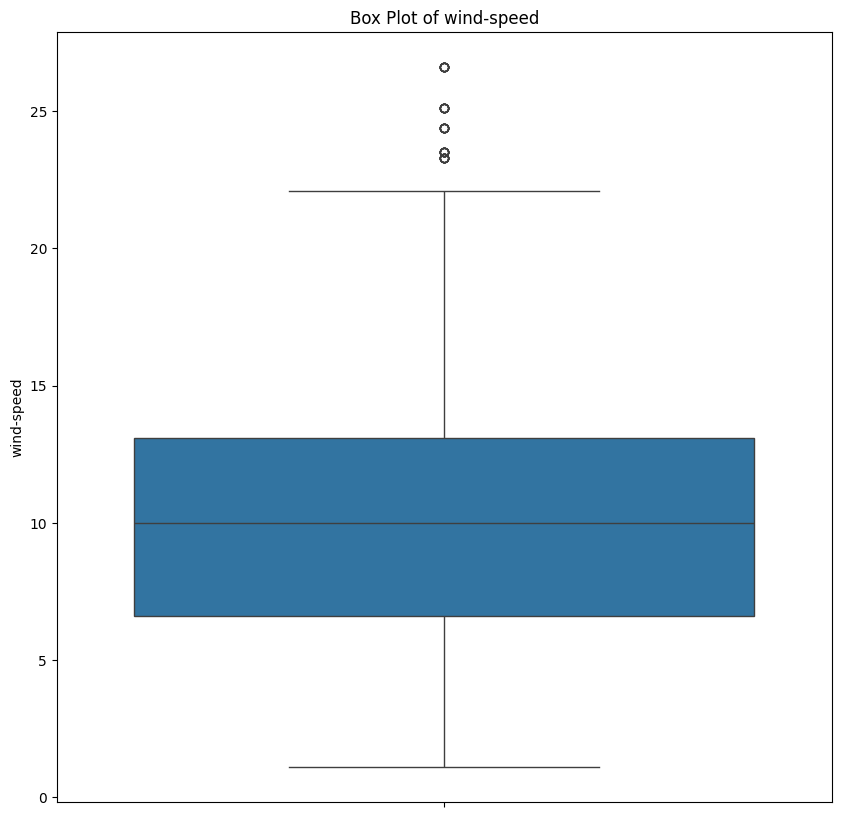

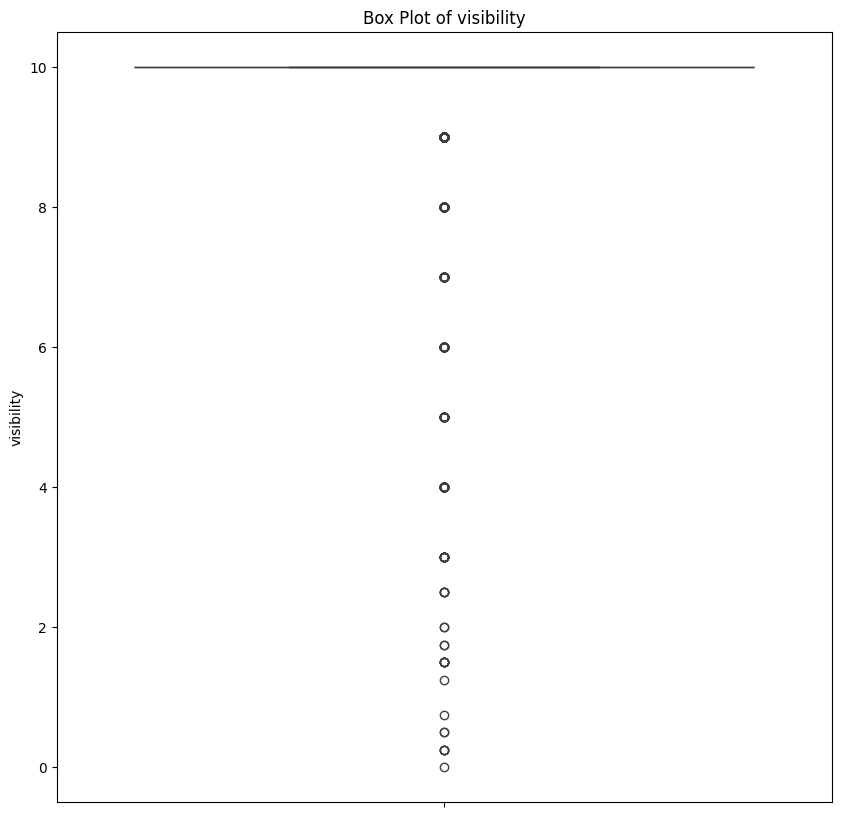

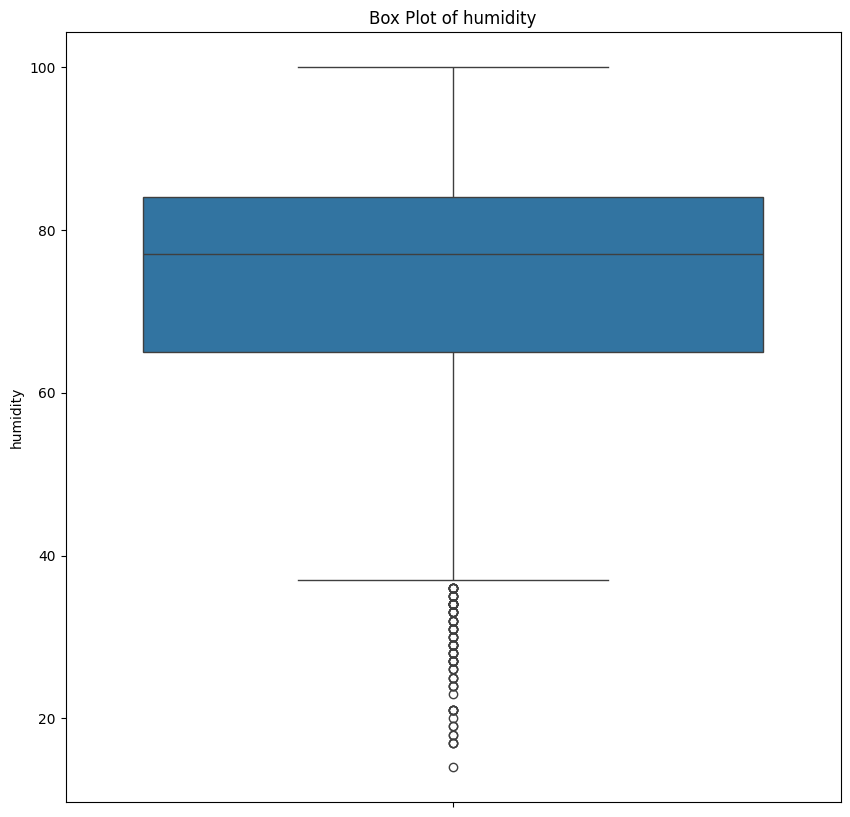

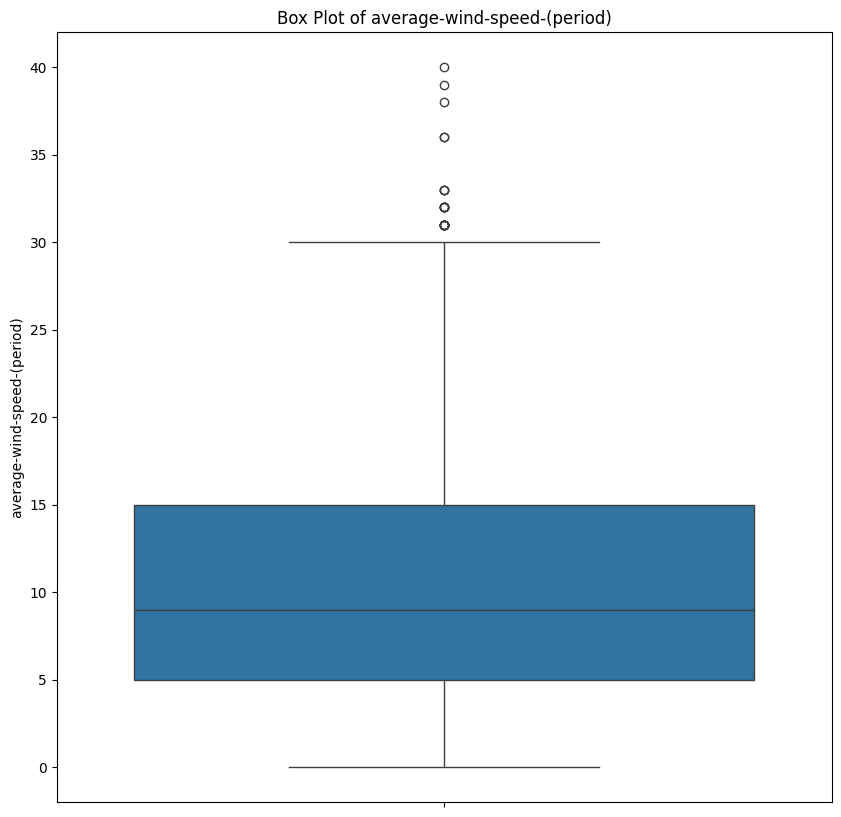

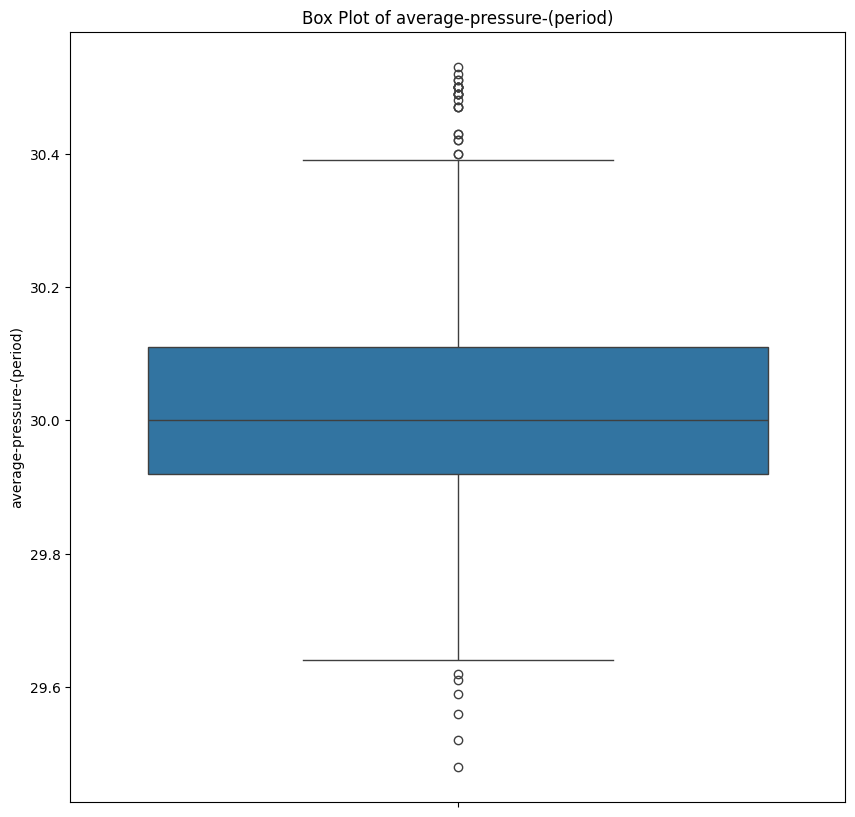

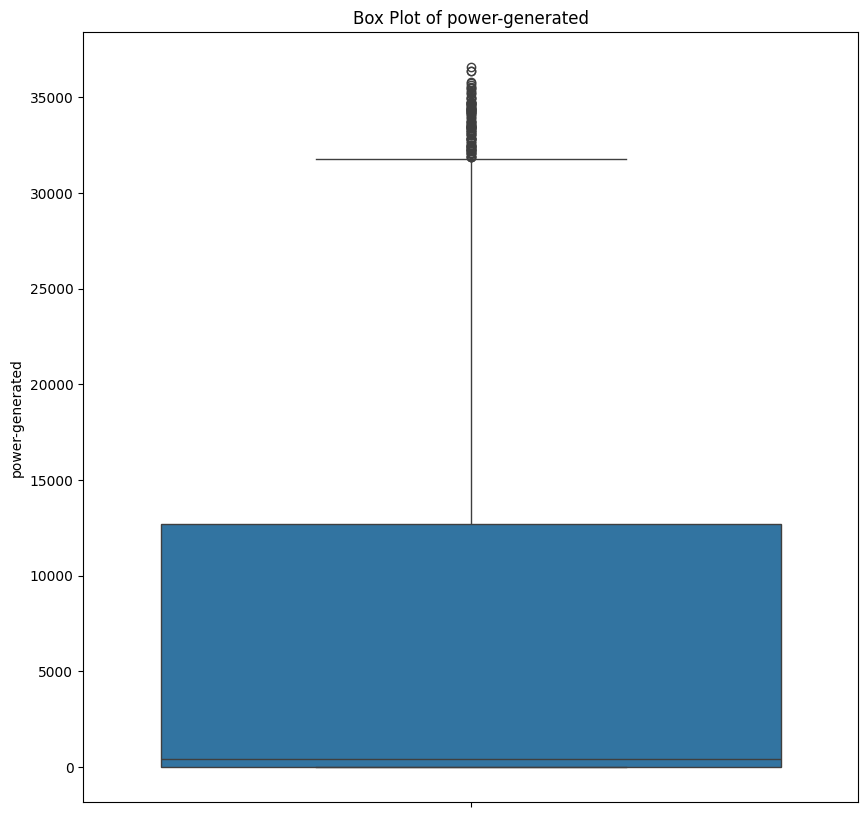

In [ ]:
#box plot
for column in df.columns:
  if column != 'sky-cover':
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()


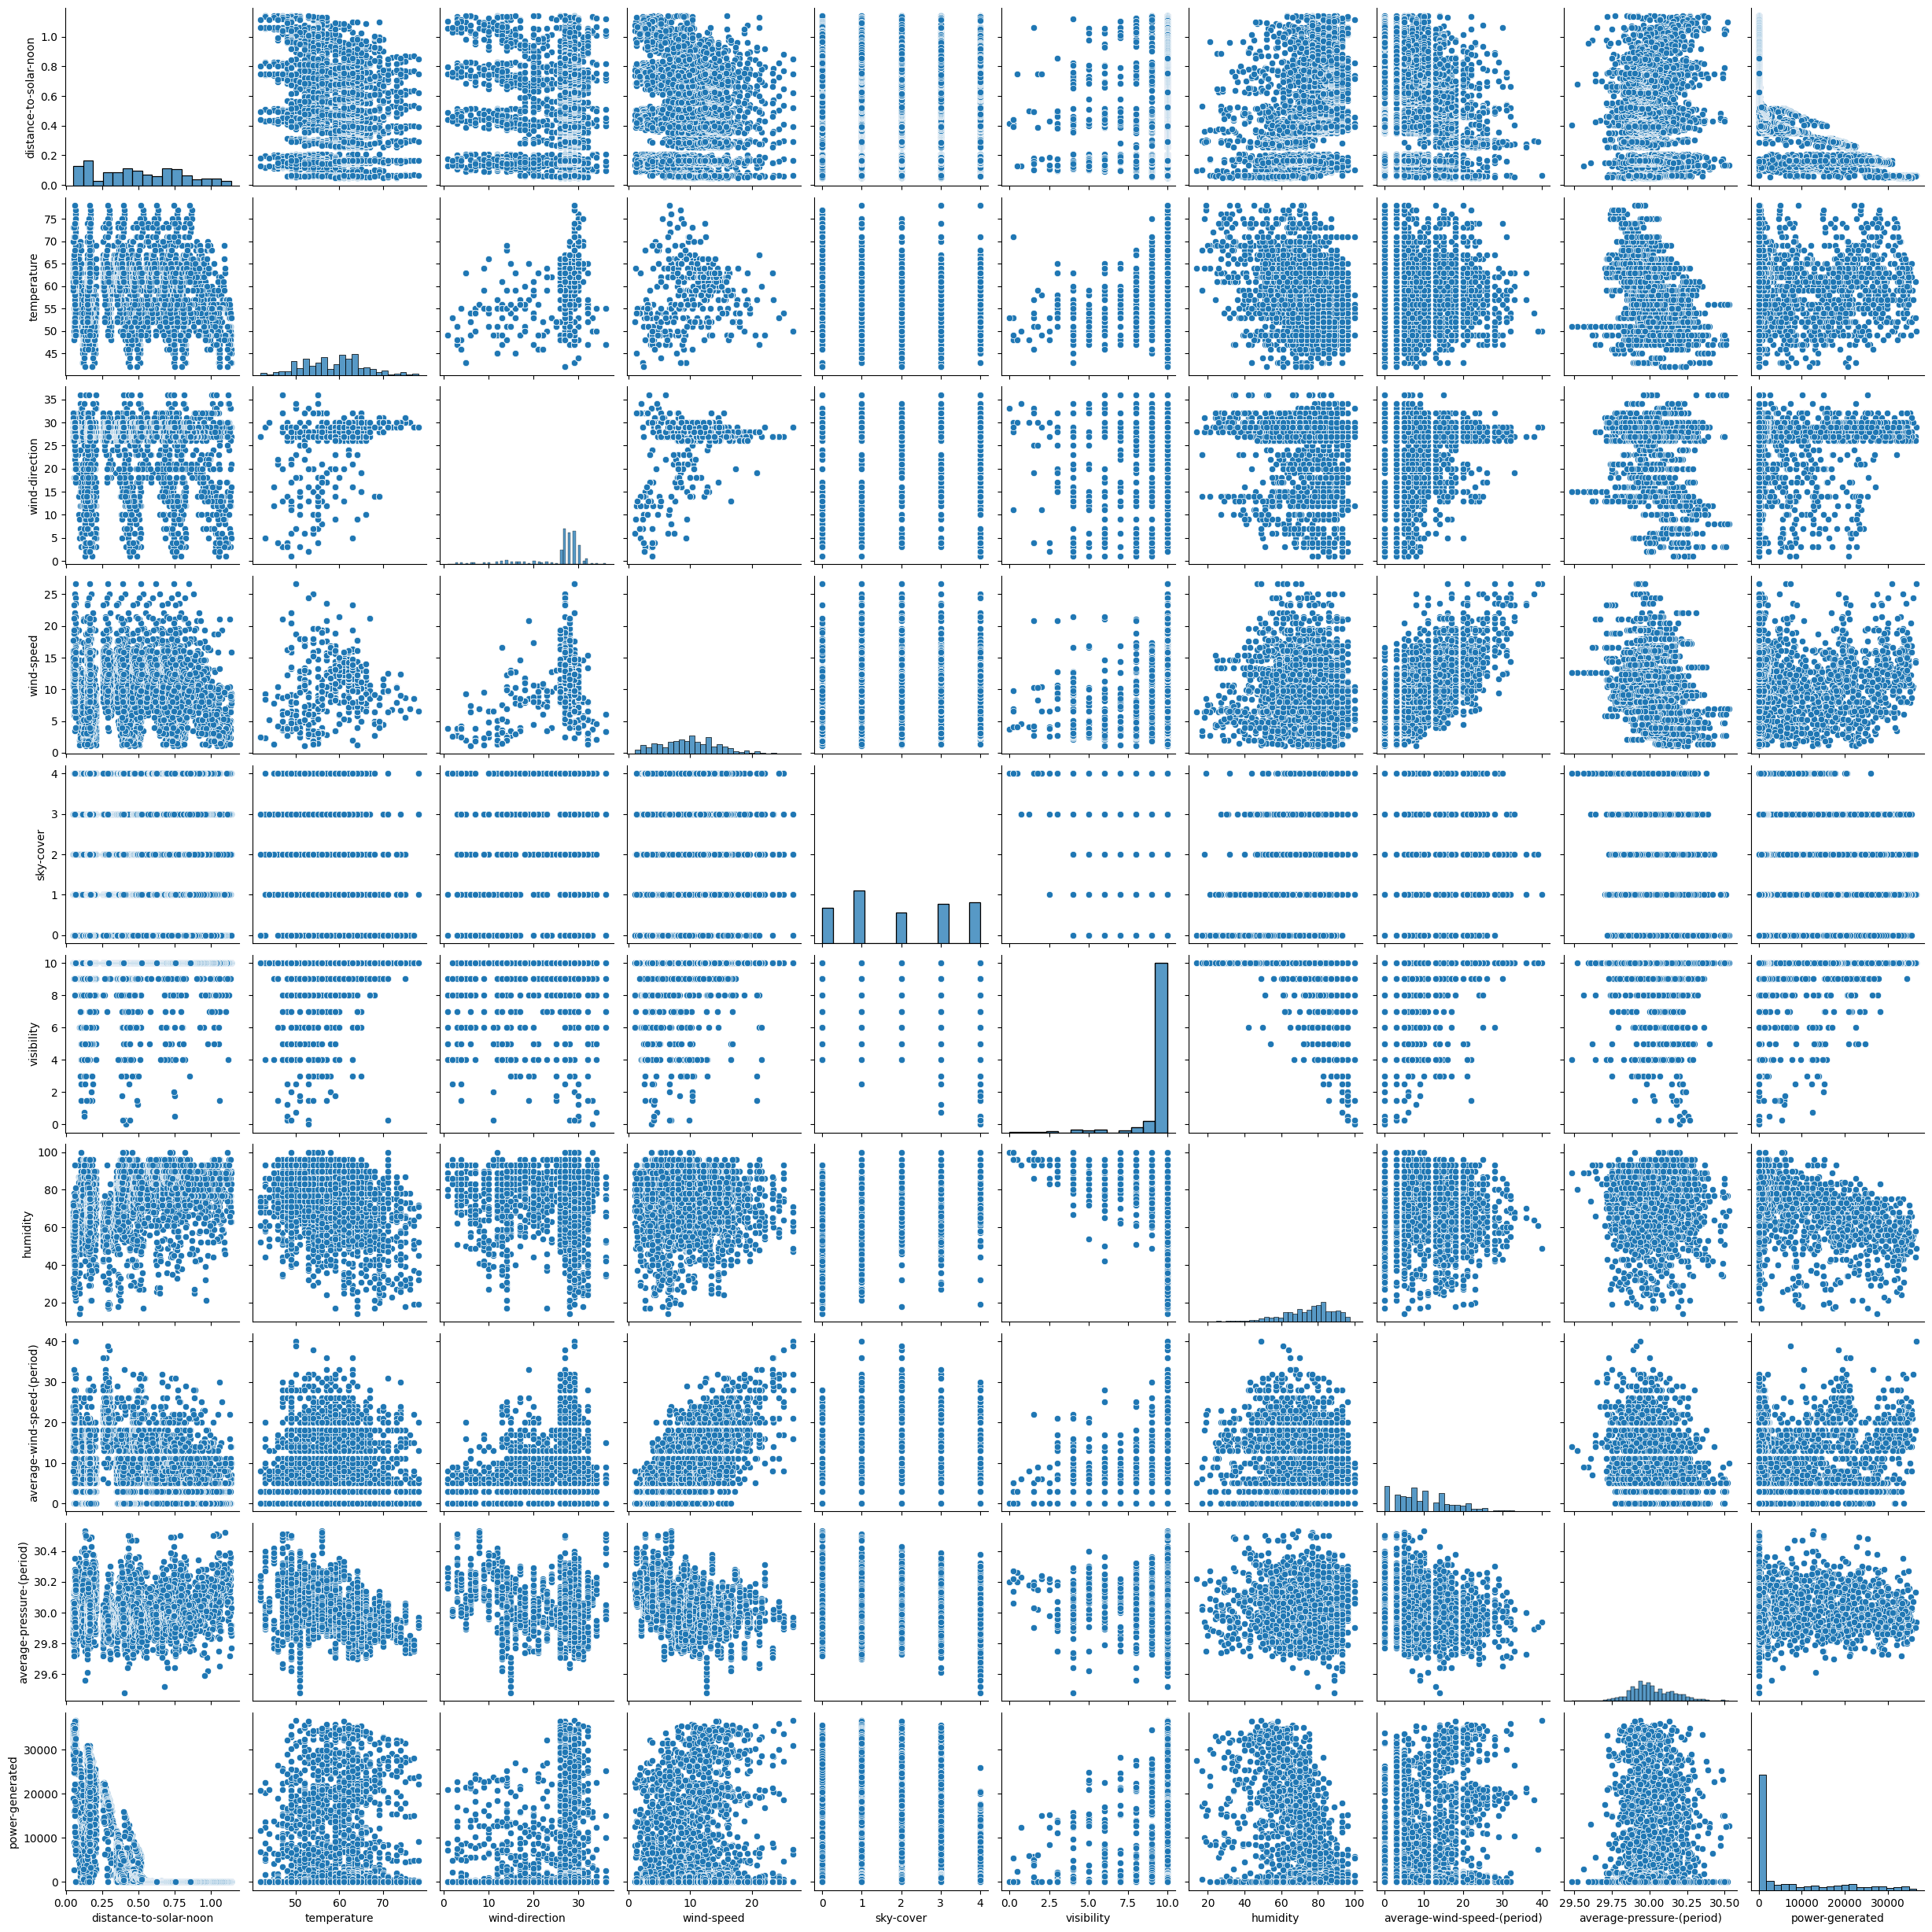

In [ ]:
# Bivariate Analysis
sns.pairplot(df, diag_kind='hist', height=2.5)


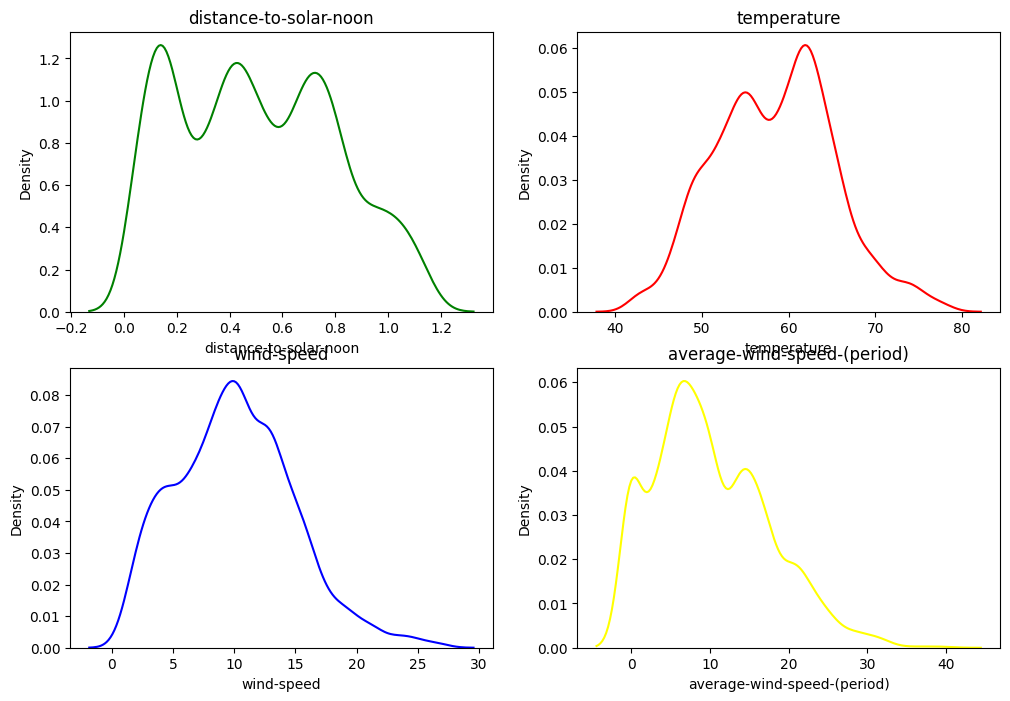

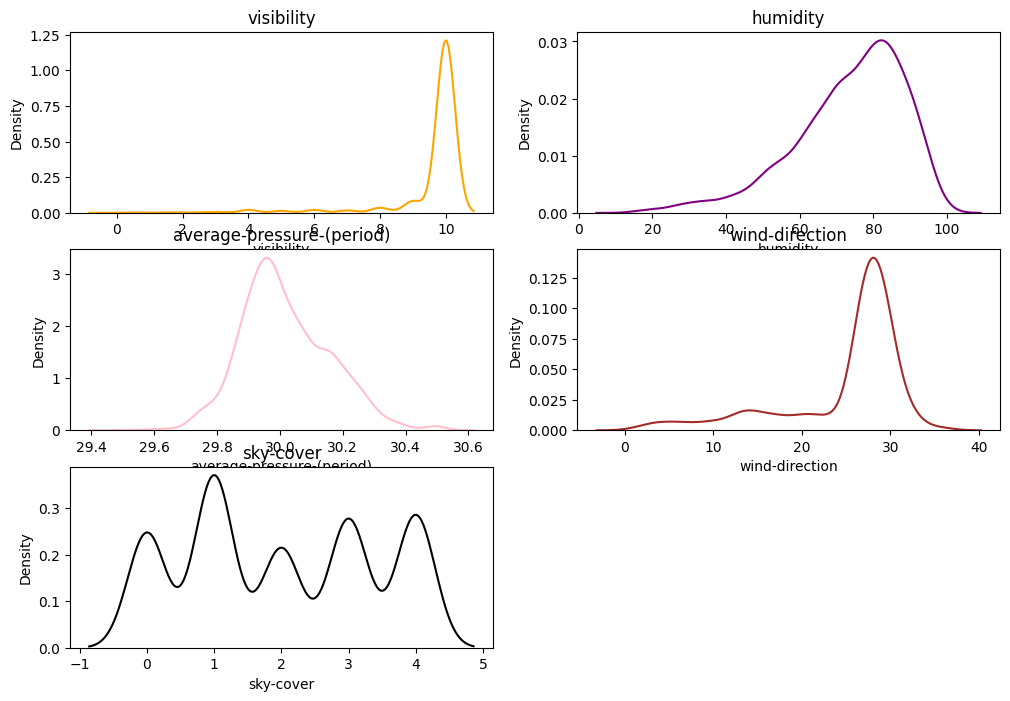

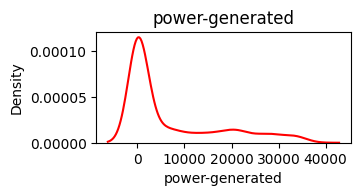

In [ ]:
#kDE plot (smoothie version of histogram)

plt.figure(figsize=(12,8))
#plot2
plt.subplot(2,2,1)
sns.kdeplot(df['distance-to-solar-noon'], color='green')
plt.title('distance-to-solar-noon')

#plot2
plt.subplot(2,2,2)
sns.kdeplot(df['temperature'], color='red')
plt.title('temperature')
#plot3
plt.subplot(2,2,3)
sns.kdeplot(df['wind-speed'], color='blue')
plt.title('wind-speed')
#plot4
plt.subplot(2,2,4)
sns.kdeplot(df['average-wind-speed-(period)'], color='yellow')
plt.title('average-wind-speed-(period)')
plt.figure(figsize=(12,8))
#plot5
plt.subplot(3,2,1)
sns.kdeplot(df['visibility'], color='orange')
plt.title('visibility')
#plot6
plt.subplot(3,2,2)
sns.kdeplot(df['humidity'], color='purple')
plt.title('humidity')
#plot7
plt.subplot(3,2,3)
sns.kdeplot(df['average-pressure-(period)'], color='pink')
plt.title('average-pressure-(period)')
#plot8
plt.subplot(3,2,4)
sns.kdeplot(df['wind-direction'], color='brown')
plt.title('wind-direction')
#plot9
plt.subplot(3,2,5)
sns.kdeplot(df['sky-cover'], color='black')
plt.title('sky-cover')
plt.show()
#plot10
plt.subplot(3,2,6)
sns.kdeplot(df['power-generated'], color='red')
plt.title('power-generated')
plt.tight_layout()
plt.show()


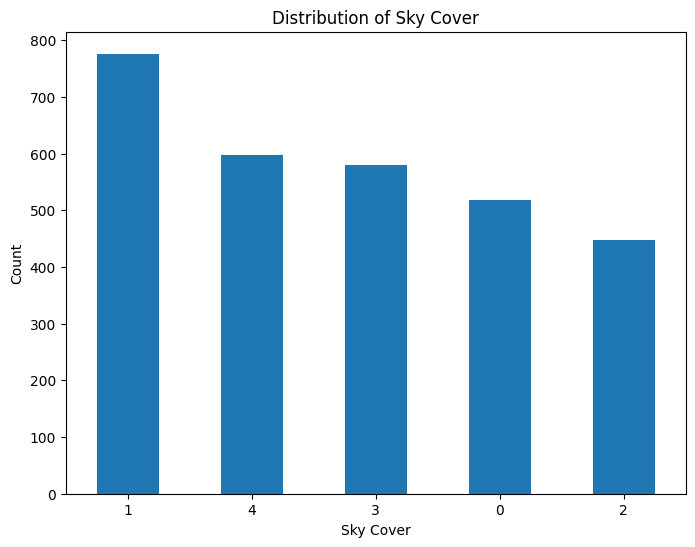

In [ ]:

# Bar graph for sky view

sky_cover_counts = df['sky-cover'].value_counts()

plt.figure(figsize=(8, 6))
sky_cover_counts.plot(kind='bar')
plt.xlabel('Sky Cover')
plt.ylabel('Count')
plt.title('Distribution of Sky Cover')
plt.xticks(rotation=0)
plt.show()


Data Cleaning

In [ ]:
df.corr()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214869,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054556,-0.435723,0.132193
wind-direction,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229805,-0.272405,0.146788
wind-speed,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.673441,-0.379752,0.142641
sky-cover,-0.015184,-0.230672,-0.137140,0.107793,1.000000,-0.223523,0.394576,0.044300,-0.091512,-0.187236
visibility,0.065807,0.194110,0.203445,0.184778,-0.223523,1.000000,-0.291320,0.143437,-0.105345,0.076536
humidity,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,1.000000,-0.218037,0.018489,-0.522545
average-wind-speed-(period),-0.214869,0.054556,0.229805,0.673441,0.044300,0.143437,-0.218037,1.000000,-0.293458,0.278188
average-pressure-(period),0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293458,1.000000,-0.036771
power-generated,-0.746681,0.132193,0.146788,0.142641,-0.187236,0.076536,-0.522545,0.278188,-0.036771,1.000000


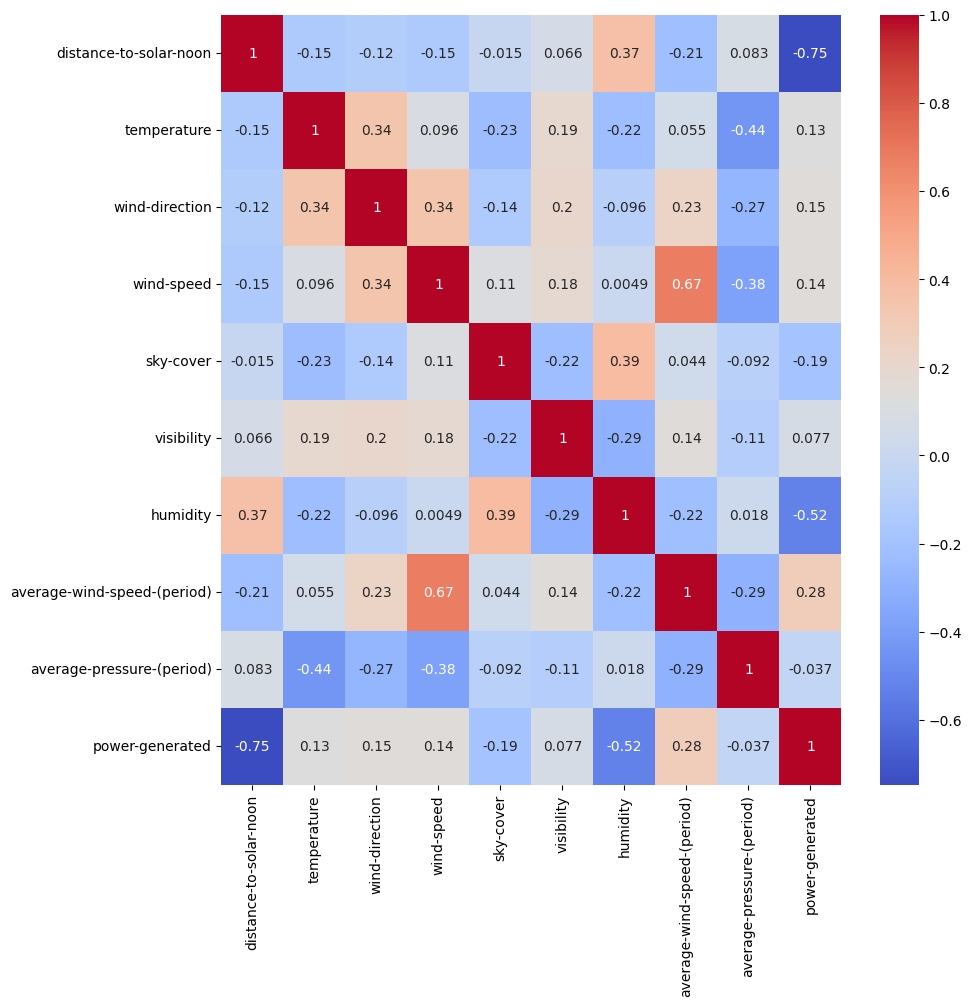

In [ ]:
# heat map

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Data transformation

In [ ]:
pip install scikit-learn==1.5.1


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
#Handling missing values- Impute missing values with the mean
imputer=SimpleImputer(strategy='mean')
data_imputed=imputer.fit_transform(df)


In [ ]:
#Scaling features - Standardizing the data
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_imputed)

In [ ]:
#Converting back to a DataFrame for easier handling
df_scaled=pd.DataFrame(data_scaled,columns=df.columns)

In [ ]:
#Display the first few rows of the scaled data
df_scaled.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,1.196765,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.098597,-0.293255,-1.392859,-0.676960
1,0.420310,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.231271,-0.706530,-1.181564,-0.676960
2,-0.356146,1.539688,0.440639,-0.536861,-1.407962,0.319659,-0.233088,-1.395322,-0.899837,-0.151480
3,-1.132602,1.539688,0.440639,-0.536861,-1.407962,0.319659,-2.687555,-1.395322,-0.758974,1.793999
4,-1.469066,1.539688,0.440639,-0.536861,-1.407962,0.319659,-3.483598,-0.982047,-0.899837,2.239367


**MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Splitting the data into training and testing sets
X = df_scaled.drop(columns='power-generated')
y = df_scaled['power-generated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[name] = {'MAE': mae, 'R2': r2}

# Display the evaluation results
results


{'Linear Regression': {'MAE': 0.48311141264706364, 'R2': 0.62506152958632},
 'Decision Tree Regressor': {'MAE': 0.19387388427854818,
  'R2': 0.8151691614529843},
 'Random Forest Regressor': {'MAE': 0.15001908509710585,
  'R2': 0.890136464538561},
 'Gradient Boosting Regressor': {'MAE': 0.1628610296442718,
  'R2': 0.900905003466246}}

In [ ]:
#arrange in ascending order
results_df=pd.DataFrame(results).T
results_df.sort_values(by='R2',ascending=False)

,MAE,R2
Gradient Boosting Regressor,0.162861,0.900905
Random Forest Regressor,0.150019,0.890136
Decision Tree Regressor,0.193874,0.815169
Linear Regression,0.483111,0.625062


In [ ]:
#model preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split





In [ ]:
# Splitting the data into training and testing sets
X = df_scaled.drop(columns='power-generated')
y = df_scaled['power-generated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params={
    "n_estimators":np.arange(50,300,50),
    "max_depth":np.arange(3,10),
    "min_samples_split":np.arange(2,10),
    "learning_rate":np.linspace(0.01,0.3,10),
    "loss":["squared_error"],
}





In [ ]:
#fit reg model
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error, r2_score
reg=ensemble.GradientBoostingRegressor()
reg.fit(X_train,y_train)
mse=mean_absolute_error(y_test,reg.predict(X_test))
print("MAE:",mse)
r2=r2_score(y_test,reg.predict(X_test))
print("R2:",r2)

MAE: 0.16272647254972433
R2: 0.9010136758945348


In [ ]:
#making prediction
input_data=(1.19,1.53,0.44,-0.53,-1.40,0.31,0.09,-0.29,-1.39)
#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array as we are predictingfor one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=reg.predict(input_data_reshaped)
print(prediction)


[-0.67585049]


**DEPLOYMENT**

In [ ]:
#Saving the trained model
import pickle
filename='solar_power_model.sav'
pickle.dump(reg,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('solar_power_model.sav','rb'))

In [ ]:
#making prediction
input_data=(1.19,1.53,0.44,-0.53,-1.40,0.31,0.09,-0.29,-1.39)
#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array as we are predictingfor one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)


[-0.67585049]
